# 1. Classification examples
---

## 1.1. Using KNN (K nearest neighbors) classifier for iris dataset 

### Loading dataset

In [72]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target

In [73]:
random_index = np.random.choice(np.arange(X.shape[0]), size = 5)
print([X[i] for i in random_index])
print([y[i] for i in random_index])
print([iris.target_names[y[i]] for i in random_index])

[array([6.7, 3.3, 5.7, 2.1]), array([5. , 3.4, 1.5, 0.2]), array([6.4, 3.2, 4.5, 1.5]), array([6.1, 2.9, 4.7, 1.4]), array([6.7, 3.1, 4.4, 1.4])]
[2, 0, 1, 1, 1]
['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor']


### Spliting dataset

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)
print(len(X_train), len(X_test))

90 60


### Preprocessing data
Comment for the first run

In [75]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Training model

In [76]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 1)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Evaluating and predicting

In [77]:
from sklearn import metrics
y_pred = classifier_knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [78]:
print('Train score:', classifier_knn.score(X_train, y_train))
print('Test score:', classifier_knn.score(X_test, y_test))

Train score: 1.0
Test score: 0.9666666666666667


In [79]:
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds]
print("Predictions:", pred_species)

Predictions: ['virginica', 'virginica']


### Doing grid search

In [80]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors': [3, 5, 11, 19]}
# grid_params = {'n_neighbors': [3, 5, 11, 19], 'weights':['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [81]:
gs_results.best_score_

0.9444444444444445

In [82]:
gs_results.best_params_

{'n_neighbors': 3}

In [83]:
gs_results.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [84]:
gs_results.best_estimator_.score(X_test, y_test)

0.9833333333333333

## 1.2. Using SVM classifier for digit dataset 

### Loading dataset

In [85]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
digits = datasets.load_digits()

### Preprocessing data

In [86]:
print(digits.images.shape)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 8, 8)
(1797, 64)


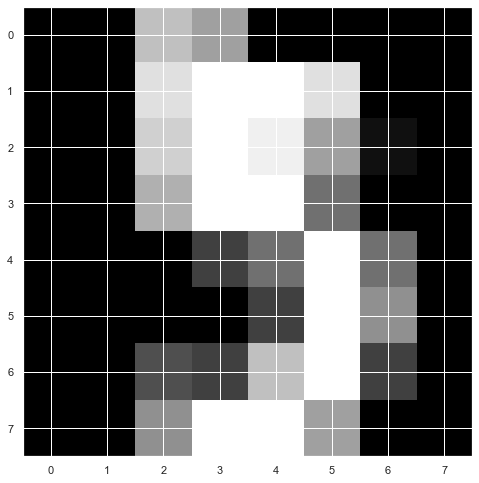

In [87]:
import matplotlib.pyplot as plt
img = digits.images[5].reshape(8,8)
plt.imshow(img, cmap = 'gray')

### Spliting dataset

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)
print(len(X_test))

360


### Training model

In [89]:
classifier = svm.SVC(kernel = 'rbf', C = 10, gamma = 1e-3)
classifier.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

### Evaluating and predicting

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


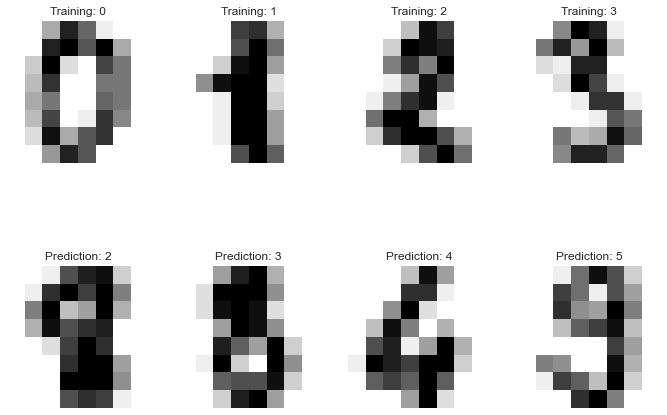

In [90]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

_, axes = plt.subplots(2, 4)

images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()

Classification report for classifier SVC(C=10, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      0.84      0.91        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        36
           8       0.86      0.97      0.91        33
           9       0.92      0.95      0.93        37

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360


Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  2  0  0  4  0]
 [ 0  0  0  0 34  0  0  0  0 

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


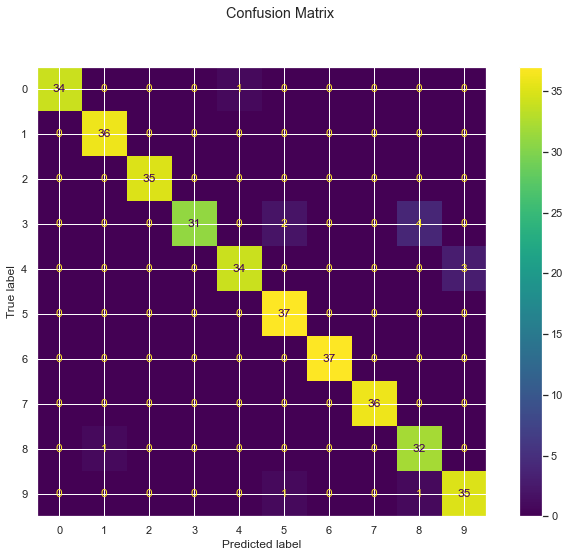

In [91]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [92]:
classifier.score(X_train, y_train)

1.0

In [93]:
classifier.score(X_test, y_test)

0.9638888888888889

### Doing grid search
There some parameters in SVM classifier: C, kernel.

In [94]:
from sklearn.model_selection import GridSearchCV
grid_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1., 10., 100., 1000.]},\
               {'kernel': ['linear'], 'C': [1., 10., 100., 1000.]}]
# Complete code for grid search and display results
gs = GridSearchCV(svm.SVC(), grid_params, verbose = 1, cv = 5, n_jobs = -1, scoring = 'accuracy')
gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [95]:
print('Best param:', gs_results.best_params_)
print('Best score:', gs_results.best_score_)
print('Test score',gs_results.best_estimator_.score(X_test, y_test))

# True output:

# Best param: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
# Best score: 0.9700765483646486
# Test score 0.9638888888888889

Best param: {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}
Best score: 0.9770349399922571
Test score 0.9638888888888889


# 2. Regression examples
---

## 2.1. Linear Regression with diabete dataset

### Loading dataset

In [96]:
from sklearn import datasets
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)
print(diabetes_X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [97]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(diabetes_X.shape)
print(diabetes_X[0])

(442, 1)
[0.06169621]


### Spliting dataset

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, shuffle=False)

### Training model

In [99]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [100]:
regr

LinearRegression()

### Evaluating and predicting

In [101]:
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [957.76202681]


In [102]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 4079.82
Coefficient of determination: 0.36


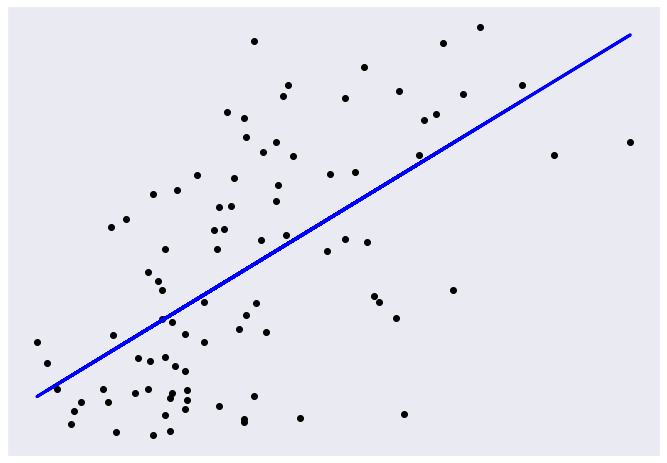

In [103]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 2.2. Poly Regression with diabete dataset

### Loading dataset

In [104]:
from sklearn import datasets
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)

(442, 10)


In [105]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

### Spliting dataset

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, shuffle=False)

### Training model

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree = 7
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

### Evaluating and predicting

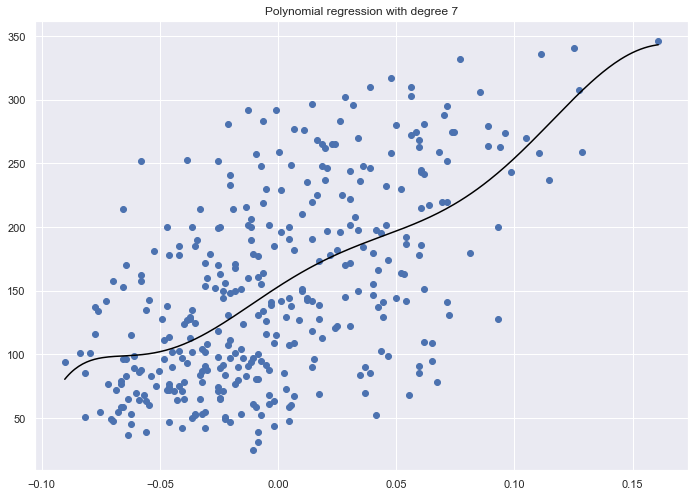

In [108]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_train,y_train)
X_seq = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = polyreg.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 4123.16
Coefficient of determination: 0.36


# 3. Clustering examples

### Loading dataset

In [135]:
from sklearn.datasets import make_blobs
import numpy
X, _ = make_blobs(n_samples=200, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

### Training model

In [112]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Evaluating and predicting

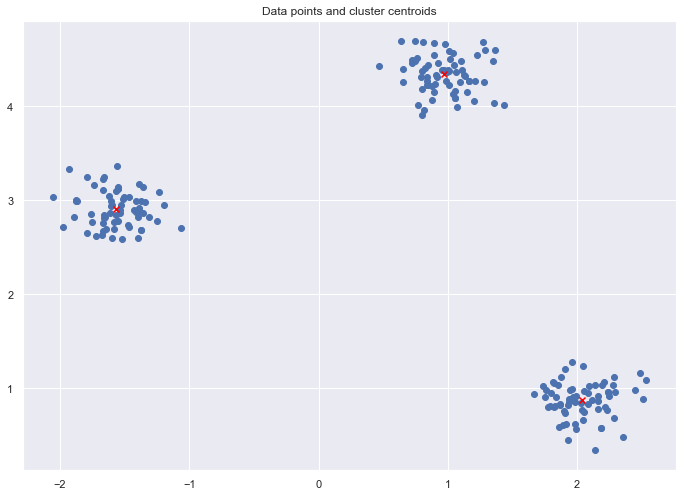

In [137]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, 1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [114]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.8887266128357761


## Save and load model

In [115]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [116]:
import os
os.listdir()

['.ipynb_checkpoints',
 'best_model.pkl',
 'ExampleSklearn.ipynb',
 'ExampleSklearn_Full.ipynb',
 'finalized_model.sav',
 'Regression.ipynb']

# Bài tập 1

## Linear Regression với bộ Boston Housing Dataset

## Load dữ liệu

In [117]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

* load the housing data from the scikit-learn library

In [118]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [119]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


* data: contains the information for various houses

* target: prices of the house

* feature_names: names of the features

* DESCR: describes the dataset

In [120]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [121]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


* Ta thấy là giá trị mục tiêu PRICE là chưa có trong bảng data. Ta tạo một column mới có giá trị là giá trị mục tiêu PRICE và thêm vào dataframe.

In [122]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data preprocessing

In [123]:
# Kiểm tra dữ liệu bị thiếu
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Phân tích khám phá dữ liệu  (Exploratory Data Analysis)
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

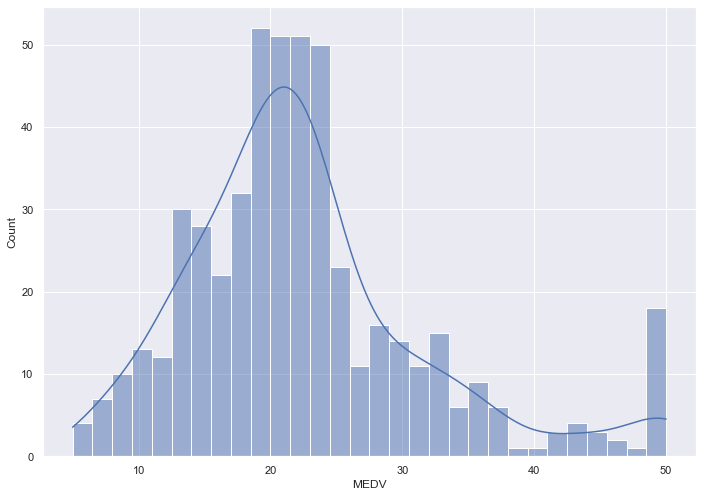

In [124]:
#Let’s first plot the distribution of the target variable PRICE. We will use the distplot function from the seaborn library.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(boston['MEDV'], bins=30, kde = True)
plt.show()

## => Như vậy là target được phân phối chuẩn với một vài ngoại biên

### Tạo ma trận tương quan

<AxesSubplot:>

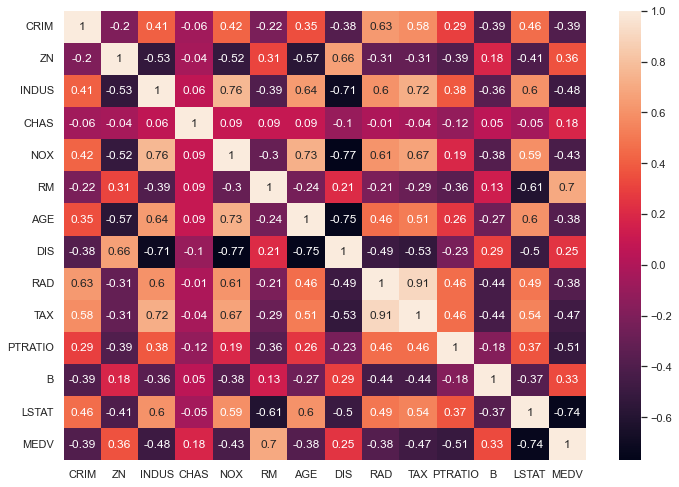

In [125]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

* The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

* Observations:
To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

* Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

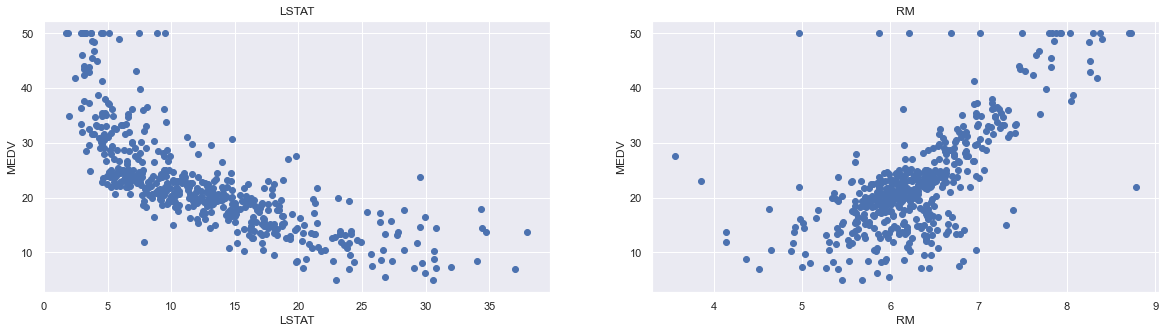

In [126]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

* Observations:

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

## Preparing the data for training the model
We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [127]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

## Splitting the data into training and testing sets
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

## Model evaluation
We will evaluate our model using RMSE and R2-score.


In [130]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


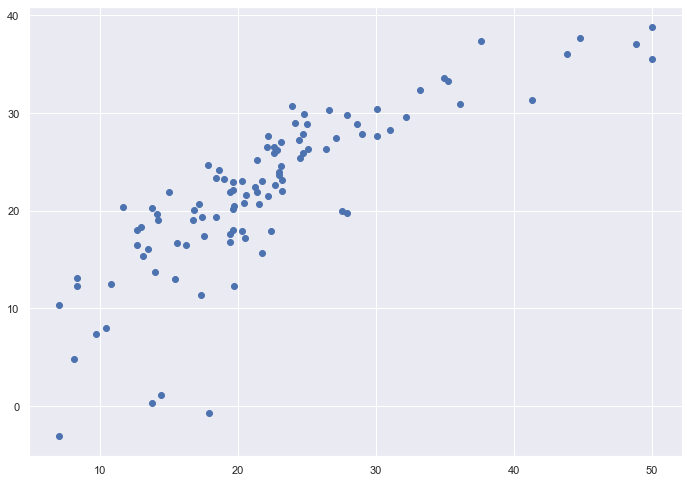

In [131]:

# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()